<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/main/7_AdvancedConcepts/dataanalysis/DataAnalysis_CIFAR10Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data.dataloader import DataLoader
from collections import Counter

### Download the dataset

In [ ]:
train_dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())


Extracting data/cifar-10-python.tar.gz to data/


### How many images does the training dataset contain?




In [ ]:
train_dataset_size = len(train_dataset)
train_dataset_size

50000

### How many images does the test dataset contain?




In [ ]:
test_dataset_size = len(test_dataset)
test_dataset_size

10000

### What is the mean and std value of dataset?

In [ ]:
print(train_dataset.data.mean(axis=(0,1,2))/255)
print(train_dataset.data.std(axis=(0,1,2))/255)

[0.49139968 0.48215841 0.44653091]
[0.24703223 0.24348513 0.26158784]


### How many output classes does the dataset contain? 

In [ ]:
classes = train_dataset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
num_classes = len(classes)
num_classes

10

### Lets see the number of images belonging to each class

#### Train dataset

In [ ]:
class_label = []
for img, label in train_dataset:
    class_label.append(label)

Counter(class_label)

Counter({0: 5000,
         1: 5000,
         2: 5000,
         3: 5000,
         4: 5000,
         5: 5000,
         6: 5000,
         7: 5000,
         8: 5000,
         9: 5000})

#### Test dataset

In [ ]:
class_label = []
for img, label in test_dataset:
    class_label.append(label)

Counter(class_label)

Counter({0: 1000,
         1: 1000,
         2: 1000,
         3: 1000,
         4: 1000,
         5: 1000,
         6: 1000,
         7: 1000,
         8: 1000,
         9: 1000})

Images are equally distributed across classes, there is no imbalance in the dataset

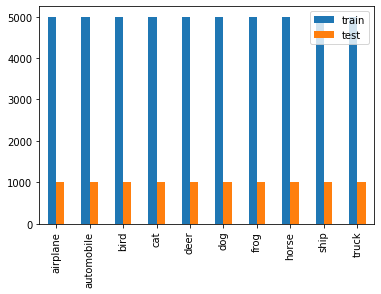

In [ ]:
import pandas as pd

_, train_counts = np.unique(train_dataset.targets, return_counts=True)
_, test_counts = np.unique(test_dataset.targets, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=train_dataset.classes
            ).plot.bar()
plt.show()



### What is the shape of an image tensor from the dataset?

In [ ]:
img, label = train_dataset[0]
img_shape = img.shape
img_shape

torch.Size([3, 32, 32])

Note that this dataset consists of 3-channel color images (RGB). Let us look at a sample image from the dataset. matplotlib expects channels to be the last dimension of the image tensors (whereas in PyTorch they are the first dimension), so we'll the .permute tensor method to shift channels to the last dimension. Let's also print the label for the image.

Label (numeric): 7
Label (textual): horse


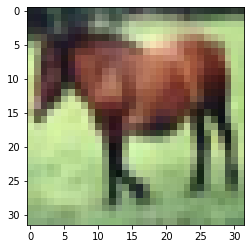

In [ ]:
img, label = train_dataset[7]
plt.imshow(img.permute((1, 2, 0)))
print('Label (numeric):', label)
print('Label (textual):', classes[label])

### Check Image size
Let's check if all the images are of same size, if not then we need to resize the images




In [ ]:
train_sizes_loader = DataLoader(dataset=train_dataset,
                             batch_size=1,
                             shuffle=False,
                             num_workers=2)

img_shape = []
for batch in train_sizes_loader:
    img_shape.append(torch.tensor(batch[0].size()).tolist())
    
from collections import Counter
Counter([tuple(i) for i in img_shape])

Counter({(1, 3, 32, 32): 50000})

**All Images in the dataset are of same size**

## View sample images

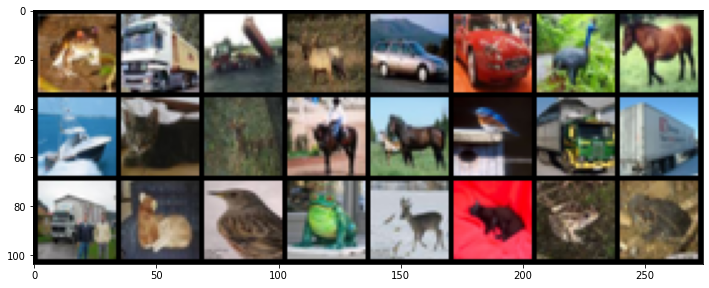

In [ ]:
# functions to show an image
fig, ax = plt.subplots(figsize=(12, 12))

def imshow(img):
    img = img      # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

train_loader = DataLoader(dataset=train_dataset,
                             batch_size=30,
                             shuffle=False,
                             num_workers=2)
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:24]))

### Sample images with corresponding labels

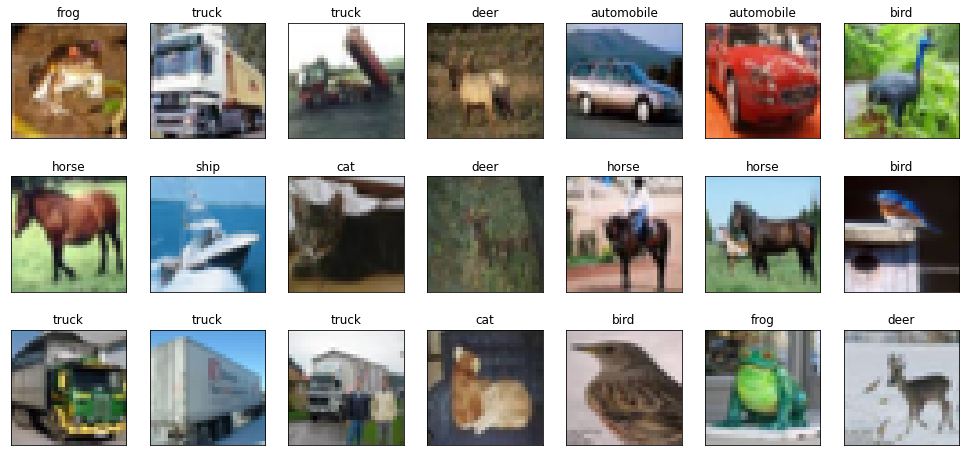

In [ ]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(classes[train_dataset[index][1]])
        axes[i,j].imshow(np.transpose(train_dataset[index][0].numpy(), (1,2,0)))
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

### Let's view 10 sample images from each class

In [ ]:
sample_dict = {}

for i, classlabel in enumerate(classes):
  images_list = [index for index, (image, label) in enumerate(train_dataset) if label == i]
  # randomly select 10 of each
  sample_dict[classlabel] = np.random.choice(images_list, 10, replace = False)

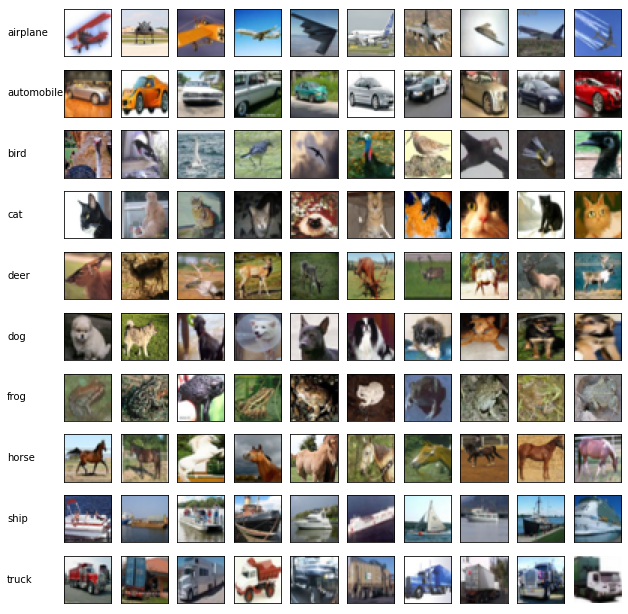

In [ ]:
fig, axes = plt.subplots(ncols=11, nrows=10, figsize=(11, 11))
index = 0
for i, classlabel in enumerate(classes):
    axes[i][0].text(x = 0, y = 0.5, s = classlabel, rotation = 0, va = "center")
    axes[i][0].get_xaxis().set_visible(False)
    axes[i][0].get_yaxis().set_visible(False)
    axes[i][0].spines['top'].set_visible(False)
    axes[i][0].spines['right'].set_visible(False)
    axes[i][0].spines['bottom'].set_visible(False)
    axes[i][0].spines['left'].set_visible(False)
    for j in range(1, 11):
        axes[i,j].imshow(np.transpose(train_dataset[sample_dict[classlabel][j-1]][0].numpy(), (1,2,0)))
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.axis('off')
plt.show()